# AlexNet

In [ ]:
# Import Packages
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from keras.datasets import cifar10

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
#comment out line if alraedy downloaded
!pip install np_utils
import np_utils
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

TensorFlow version: 2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=68fd4c84ec54a025bbdc3779c10d8e7f01927c7393f8a4fd1acec59ce0a6497c
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
Mounted at /content/drive/


Load Image Data - CIFAR10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Apply Preprocessing & one Hot Encoding

In [ ]:
# Preprocess the images (normalize pixel values for better visualization)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

num_classes = len(set(train_labels.flatten()))

# One hot encoding the target class (labels)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print (train_images.shape)
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 10)


Define the 10 classes of CIFAR10

In [ ]:
class_names = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

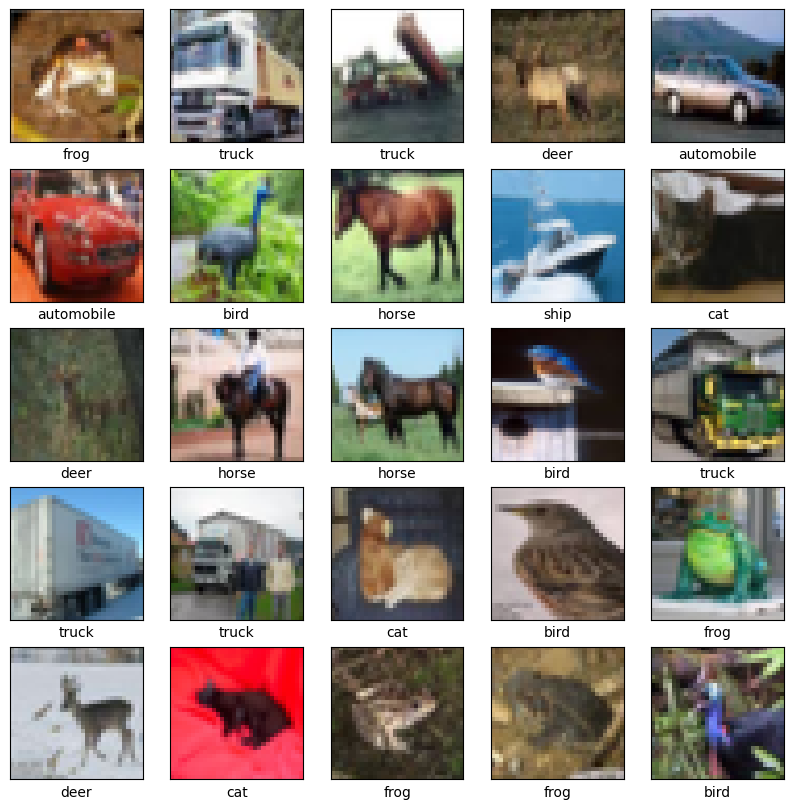

In [ ]:
import matplotlib.pyplot as plt
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid=False
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

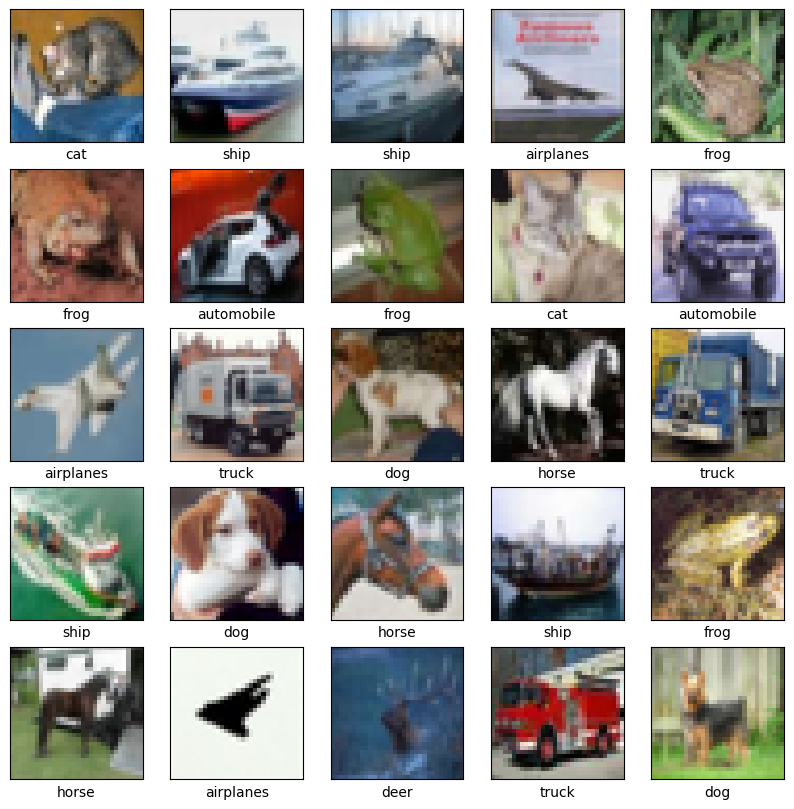

In [ ]:
class_names = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid=False
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i][0]])

plt.show()


## Defining the Model

AlexNet Architecture
<img src = https://miro.medium.com/v2/resize:fit:960/0*pJ3o_2zTTNnixhKH.png >

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

model = tf.keras.Sequential([
  # layer 1 Convolutional layer + maxpoolnig layer

  Conv2D(64, kernel_size = (11,11), padding ='valid', activation='relu', input_shape=(32, 32, 3)),
  MaxPooling2D(pool_size = (3,3), strides = 2),

  # layer 2 Convolutional layer + maxpooling layer
  Conv2D(192, kernel_size = (5,5), padding ='same', activation = 'relu'),
  MaxPooling2D(pool_size = (3,3), strides = 2, padding='same'),

  # layers 3-5 3 Convolutional layers + maxpooling layer
  Conv2D(384, kernel_size = (3,3), padding = 'same', activation = 'relu'),
  Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'),
  Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'),
  MaxPooling2D(pool_size = (3,3), strides = 2),

  # layers 6-8 2 fully connecred hidden layers and 1 fully connected  output layer
  Flatten(),
  Dense(4096, activation = 'relu'),
  Dropout(0.5),
  Dense(4096, activation = 'relu'),
  Dropout(0.5),
  Dense(10, activation = 'softmax')
])

# compile the model with a loss funciton, a metric and and optimizqation method
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 22, 22, 64)        23296     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 192)       307392    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 192)         0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 5, 384)         663936    
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 256)        

Training

In [ ]:
print(train_images.shape)
print(train_labels.shape)

history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))


(50000, 32, 32, 3)
(50000, 10)
Epoch 1/100
391/391 [==============================] - 17s 34ms/step - loss: 0.3149 - accuracy: 0.1586 - val_loss: 0.2775 - val_accuracy: 0.2659
Epoch 2/100
391/391 [==============================] - 12s 30ms/step - loss: 0.2654 - accuracy: 0.3294 - val_loss: 0.2453 - val_accuracy: 0.4072
Epoch 3/100
391/391 [==============================] - 12s 30ms/step - loss: 0.2371 - accuracy: 0.4319 - val_loss: 0.2270 - val_accuracy: 0.4612
Epoch 4/100
391/391 [==============================] - 12s 30ms/step - loss: 0.2212 - accuracy: 0.4836 - val_loss: 0.2178 - val_accuracy: 0.4895
Epoch 5/100
391/391 [==============================] - 11s 29ms/step - loss: 0.2094 - accuracy: 0.5226 - val_loss: 0.2097 - val_accuracy: 0.5196
Epoch 6/100
391/391 [==============================] - 11s 29ms/step - loss: 0.1983 - accuracy: 0.5487 - val_loss: 0.2016 - val_accuracy: 0.5389
Epoch 7/100
391/391 [==============================] - 12s 30ms/step - loss: 0.1869 - accuracy: 0.5

In [ ]:
model.save('Alex_net_Neha')

In [ ]:
np.save('AlexNet_history.npy', history)

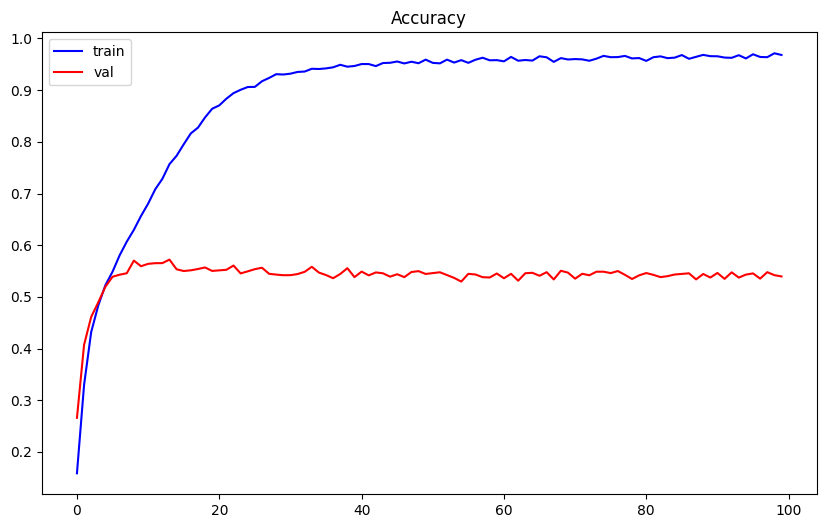

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

plot_accuracy(history)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Alex_net_Neha")

The model size is 282.2MB

## Running Inference

In [ ]:
import time
def model_inference(in_model, in_test_images):
  top_1_accuracy = 0
  top_5_accuracy = 0
  dummy_input = np.random.rand(16,32, 32, 3)
#with indented the run time is slower
  with tf.device('/gpu'):
    model = in_model
    #warmup
    for i in range(5):
      dummy_input = np.random.rand(16,32, 32, 3)
      model.predict(dummy_input)

    batch_size = 32
    inference_time = 0;
    #actually running the inference
    for x in range(in_test_images.shape[0]//batch_size):
        start_index = x * batch_size
        end_index = (x + 1) * batch_size
        batch_labels = test_labels[start_index:end_index]

        start = time.perf_counter()
        predicted = model.predict(in_test_images[start_index:end_index])
        inference_time = inference_time + (time.perf_counter() - start)

        for i in range (predicted.shape[0]):
          predicted_i = np.argsort(-predicted[i])
          if predicted_i[0] == np.argmax(batch_labels[i]):
            top_1_accuracy += 1
          for j in range (5):
            if predicted_i[j] == np.argmax(batch_labels[i]):
              top_5_accuracy += 1

    print("Top 1 accuracy: ", top_1_accuracy/test_images.shape[0])
    print("Top 5 accuracy: ", top_5_accuracy/test_images.shape[0])
    print(inference_time, "ms")

#class_names = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#running original model before optimization techniques
model = keras.models.load_model("Alex_net_Neha")
model_inference(model, test_images)

1/1 [==============================] - 0s 18ms/step
Top 1 accuracy:  0.5386
Top 5 accuracy:  0.8949
22.634063708999975 ms


In [ ]:
import time
def tflite_model_inference(in_interpreter, in_test_images, in_test_labels):
  top_1_accuracy = 0
  top_5_accuracy = 0

  with tf.device('/gpu'):
    interpreter = in_interpreter

    input_details = interpreter.get_input_details()  # Get input details
    output_details = interpreter.get_output_details()  # Get output details


    # Warmup
    dumm_input_size = 32
    dummy_input = np.random.rand(dumm_input_size, 32, 32, 3)
    interpreter.resize_tensor_input(0, [dumm_input_size, 32, 32, 3])
    interpreter.allocate_tensors()
    for i in range(10):
      interpreter.set_tensor(input_details[0]['index'], np.float32(dummy_input))
      # Run inference.
      interpreter.invoke()
      output_data = interpreter.get_tensor(output_details[0]['index'])


    batch_size = 32
    inference_time = 0;
    # Actually running the inference
    for x in range(in_test_images.shape[0]//batch_size):
        start_index = x * batch_size
        end_index = (x + 1) * batch_size
        batch_labels = test_labels[start_index:end_index]

        interpreter.set_tensor(input_details[0]['index'], np.float32(in_test_images[start_index:end_index]))
        start = time.perf_counter()
        interpreter.invoke()
        inference_time = inference_time + (time.perf_counter() - start)

        output_data = interpreter.get_tensor(output_details[0]['index'])
        for i in range (output_data.shape[0]):
          out = np.argsort(-output_data[i]) # Puts the indices in descending order
          if out[0] == np.argmax(batch_labels[i]):
            top_1_accuracy += 1
          for j in range (5):
            if out[j] == np.argmax(batch_labels[i]):
              top_5_accuracy += 1

    print("Top 1 accuracy: ", top_1_accuracy/test_images.shape[0])
    print("Top 5 accuracy: ", top_5_accuracy/test_images.shape[0])
    print(inference_time, "ms")
    return top_1_accuracy, top_5_accuracy

In [ ]:
#converting model to tflite
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Alex_net_Neha")
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
#running the tflite model before any quantization techniques
tflite_model_reg = converter.convert()
with open ('AlexNet.tflite', 'wb') as f:
  f.write(tflite_model_reg)
interpreter = tf.lite.Interpreter(model_path='AlexNet.tflite')
tflite_model_inference(interpreter, test_images, test_labels)

Top 1 accuracy:  0.5386
Top 5 accuracy:  0.8949
52.964010123002936 ms


(5386, 8949)

# Quantization

In [ ]:
#float16 quantization up to 50% reduction in model size
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_fp16_model = converter.convert()
with open ('AlexNet_fp16.tflite', 'wb') as f:
    f.write(tflite_fp16_model)
interpreter = tf.lite.Interpreter(model_path='AlexNet_fp16.tflite')
tflite_model_inference(interpreter, test_images, test_labels)


Top 1 accuracy:  0.5386
Top 5 accuracy:  0.8949
48.07981562799978 ms


(5386, 8949)

In [ ]:
#dynamic range quantization up to 75% reduction in model size
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_dynamic_model = converter.convert()
with open ('AlexNet_dynamic.tflite', 'wb') as f:
  f.write(tflite_dynamic_model)
interpreter = tf.lite.Interpreter(model_path='AlexNet_dynamic.tflite')
tflite_model_inference(interpreter, test_images, test_labels)

Top 1 accuracy:  0.5381
Top 5 accuracy:  0.8964
39.00650098899723 ms


(5381, 8964)

## Adding Redisual Connections

In [ ]:
###############################################################################################
# Change up the layers add the residual connections

In [ ]:
from tensorflow.keras import layers

def resblock(x, kernelsize=(3, 3), filters=256):
    fx = layers.Conv2D(filters, kernelsize, activation='relu', padding='same')(x)
    fx = layers.Conv2D(filters, kernelsize, activation='relu', padding='same')(fx)
    out = layers.Add()([x,fx])
    out = layers.ReLU()(out)
    out = layers.BatchNormalization()(out)
    return out

In [ ]:
# Trying to optimize the model with residual blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

def AlexNet(input_shape=(32, 32, 3)):

  inputs = Input(shape=input_shape)
  # layer 1 Convolutional layer + maxpoolnig layer
  x = Conv2D(64, kernel_size = (11,11), padding ='valid', activation='relu', input_shape=(32, 32, 3))(inputs)
  x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

  # layer 2 Convolutional layer + maxpooling layer
  x = Conv2D(192, kernel_size = (5,5), padding ='same', activation = 'relu')(x)
  x = MaxPooling2D(pool_size = (3,3), strides = 2, padding='same')(x)

  # layers 3-5 3 Convolutional layers + maxpooling layer
  x = Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
  #x = Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu')(x) #one extra conv2D layer just to ensure the inputs to the residual block is the correct size
  out = resblock(x=x)
  x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

  # layers 6-8 2 fully connecred hidden layers and 1 fully connected  output layer
  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(10, activation = 'softmax')(x)

  model = Model(inputs, x, name='AlexNet')
  return model

model = AlexNet()

# compile the model with a loss funciton, a metric and and optimizqation method
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 22, 22, 64)        23296     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 192)       307392    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 192)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 256)         4426

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

num_classes = len(set(train_labels.flatten()))

# One hot encoding the target class (labels)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(train_images.shape)
print(train_labels.shape)

tf.config.run_functions_eagerly(True)

history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 10)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
391/391 [==============================] - 37s 79ms/step - loss: 0.3116 - accuracy: 0.2043 - val_loss: 0.2569 - val_accuracy: 0.3506
Epoch 2/100
391/391 [==============================] - 26s 66ms/step - loss: 0.2458 - accuracy: 0.4039 - val_loss: 0.2285 - val_accuracy: 0.4514
Epoch 3/100
391/391 [==============================] - 28s 71ms/step - loss: 0.2254 - accuracy: 0.4718 - val_loss: 0.2158 - val_accuracy: 0.4972
Epoch 4/100
391/391 [==============================] - 28s 70ms/step - loss: 0.2123 - accuracy: 0.5089 - val_loss: 0.2155 - val_accuracy: 0.5045
Epoch 5/100
391/391 [==============================] - 26s 66ms/step - loss: 0.2013 - accuracy: 0.5406 - val_loss: 0.2022 - val_accuracy: 0.5394
Epoch 6/100
391/391 [==============================] - 26s 66ms/step - loss: 0.1914 - accuracy: 0.5693 - val_loss: 0.1960 - val_accuracy: 0.5597
Epoch 7/100
391/391 [==============================] - 27s 68ms/step - loss: 0.1822 - accuracy: 0.5926 - val_loss: 0.1970 - val_ac

In [ ]:
model.save('Alex_net_residual')

In [ ]:
np.save('AlexNet_residual_history.npy', history)

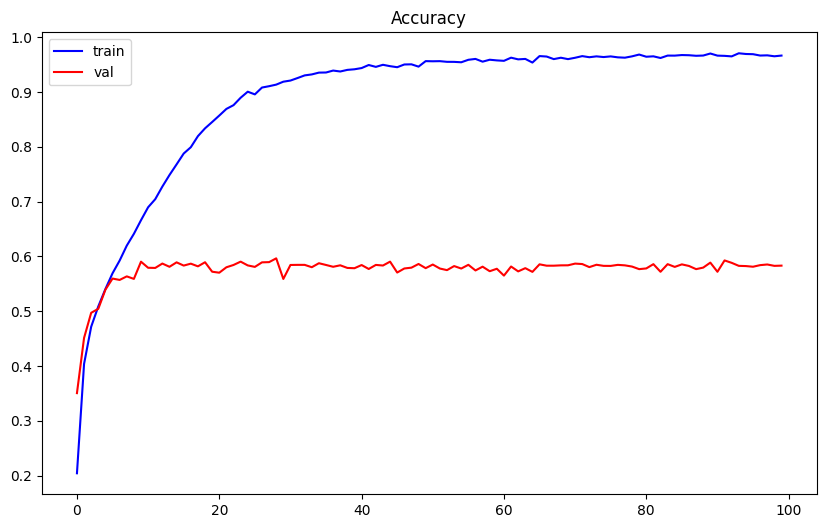

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

plot_accuracy(history)

Running Inference on Residual AlexNet model

In [ ]:
redisual_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/AlexNet_Pruned")
model_inference(redisual_model, test_images)

1/1 [==============================] - 0s 17ms/step
Top 1 accuracy:  0.5478
Top 5 accuracy:  0.903
36.53270785400025 ms


### Resrouces used

Architecture:
https://github.com/KhuyenLE-maths/Alexnet_model_with_image_classification/blob/main/Alexnet_and_image_classification.ipynb


Model Optimization:
https://www.tensorflow.org/lite/performance/model_optimization

https://www.tensorflow.org/lite/performance/post_training_float16_quant

https://studymachinelearning.com/model-quantization-methods-in-tensorflow-lite/


Redisual Networks:
https://medium.com/swlh/how-to-create-a-residual-network-in-tensorflow-and-keras-cd97f6c62557

https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-build-a-resnet-from-scratch-with-tensorflow-2-and-keras.md

https://stackoverflow.com/questions/64792460/how-to-code-a-residual-block-using-two-layers-of-a-basic-cnn-algorithm-built-wit


Running on the GPU:
https://stackoverflow.com/questions/59616788/how-to-move-a-tensorflow-keras-model-to-gpu

